In [1]:
%run 'pymol_and_pdb_functions.py'
import itertools
notebook_prefix = 'ks16'

%run 'ks01_Functions_only.ipynb'

/home/alm/anaconda2/envs/mr_propper/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


KeyError: 'Percent buried residues'

## Custom  plot functions

In [2]:
from scipy.stats import gaussian_kde

def density_scatter(x,y,ax,s=7):
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, s=s, edgecolor='')
    
def set_legend_linewidth(legend_object,lw=3.0):
    for legobj in legend_object.legendHandles:
        legobj.set_linewidth(lw)

In [3]:
%run ks01_Data_import.ipynb

11510
259


/home/alm/anaconda2/envs/mr_propper/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: the raise_on_error=False keyword is deprecated, use errors='ignore' instead


In [4]:
rosetta_folder = os.path.join(analysis_folder, 'Sasha', 'rosetta_runs', '')
predicted_ddG = pd.read_table(rosetta_folder + 'run-170503-results.csv')
predicted_ddG['mut_number'] = predicted_ddG['mut_list_Scer'].apply(lambda s: s.count(':')+1)
WT_score = np.mean([-562.382, -562.380, -562.375])
predicted_ddG['ddG'] = predicted_ddG.apply(lambda x: np.mean([x['ddg_score1'],x['ddg_score2'],x['ddg_score3']]) - WT_score,axis=1)

potential_dict = OrderedDict()
for i in range(1,13):
    potential_dict['S%s_scaled' %i] =  pd.read_csv('../Katya/NN/residuals/S%s.csv' %i)
potential_with_segments_column = []
for segment_,data_ in potential_dict.items():
    print segment_
    data_copy = data_.copy()
    data_copy['segment'] = segment_
    potential_with_segments_column.append(data_copy)
potential_concat = pd.concat(potential_with_segments_column,axis=0)
potential_and_ddG = pd.merge(predicted_ddG,potential_concat,on='aa_seq')




S1_scaled
S2_scaled
S3_scaled
S4_scaled
S5_scaled
S6_scaled
S7_scaled
S8_scaled
S9_scaled
S10_scaled
S11_scaled
S12_scaled


In [14]:
potential_and_ddG.shape

(40889, 12)

## Final: fitnessPotential vs ddG

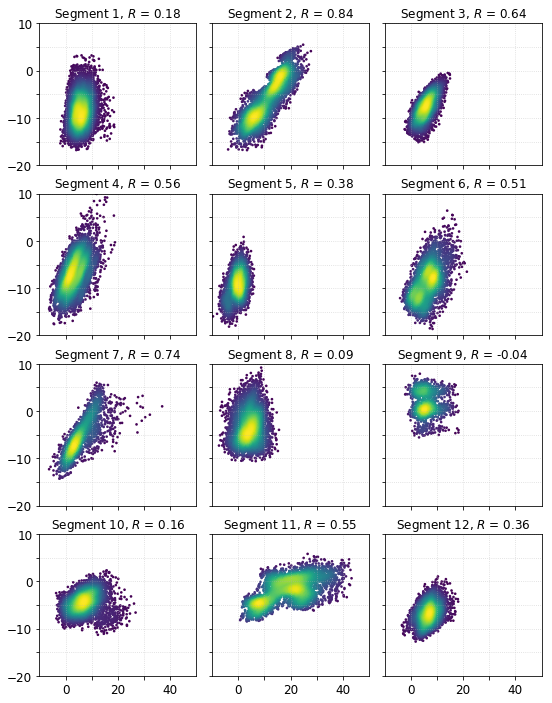

In [13]:
plt.close('all')
fig = plt.figure(figsize=(9,12))
for i in range(1,13):

    d = potential_and_ddG[potential_and_ddG['segment_x']=='S%s_scaled'%i]
    ax = fig.add_subplot(4,3,i)
    ax.grid(alpha=.5,ls=":",which='both')

    density_scatter(d.ddG.values,d.fitnessPotential.values,ax)
    ax.set_xlim([-10,50])
    ax.set_ylim([-20,10])
#     if i == 10:
#         plt.xlabel(r"Predicted $\Delta\Delta$G",size=14)
#         plt.ylabel('Predicted fitness potential',size=14)
    if i in [1,2,3,4,5,6,7,8,9]:
        ax.set_xticks([0,10,20,30,40])
        ax.set_xticklabels([])
    else:
        ax.set_xticks([0,10,20,30,40])
        ax.set_xticklabels(['0','','20','','40'],fontsize=12)        
    if i in [2,3,5,6,8,9,11,12]:
        ax.set_yticklabels([])
    else:
        ax.set_yticklabels([u'−20','',u'−10','','0','','10'],fontsize=12)
    ax.set_title(r"Segment %s, $R$ = %.2f" % (i, stats.linregress(d.ddG.values,d.fitnessPotential.values).rvalue),size=12,fontweight='normal')
plt.subplots_adjust(hspace =.2)
plt.subplots_adjust(wspace =.1)
plt.savefig("../Sasha/S7-ddG-fitnessPotential-Pearson.png",bbox_inches='tight',dpi=300)

## Final: ddG vs fitness

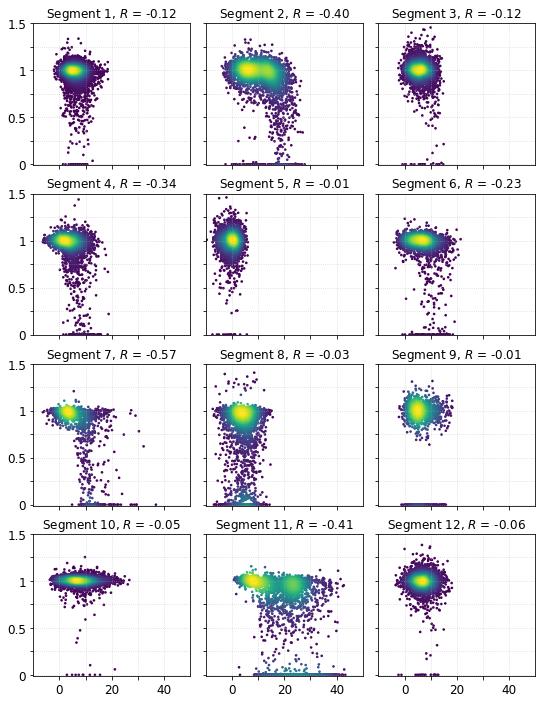

In [12]:
plt.close('all')

fig = plt.figure(figsize=(9,12))
for i in range(1,13):

    d = potential_and_ddG[potential_and_ddG['segment_x']=='S%s_scaled'%i]
    ax = fig.add_subplot(4,3,i)

    density_scatter(d.ddG.values,d.observed.values,ax)
#     if i == 10:
#         plt.xlabel(r"Predicted $\Delta\Delta$G",size=14)
#         plt.ylabel('Measured fitness',size=14)
    ax.grid(alpha=.5,ls=":",which='both')

    ax.set_xlim([-10,50])
    ax.set_ylim([-0.01,1.5])


    if i in [1,2,3,4,5,6,7,8,9]:
        ax.set_xticks([0,10,20,30,40])
        ax.set_xticklabels([])
    else:
        ax.set_xticks([0,10,20,30,40])
        ax.set_xticklabels(['0','','20','','40'],fontsize=12)        
    if i in [2,3,5,6,8,9,11,12]:
        ax.set_yticklabels([])
    else:
        
        ax.set_yticks([0,0.25,.5,.75,1.,1.25,1.5])
        ax.set_yticklabels(['0','','0.5','','1','','1.5'],fontsize=12)
        
        
    ax.set_title(r"Segment %s, $R$ = %.2f" % (i, stats.linregress(d.ddG.values,d.observed.values).rvalue),size=12,fontweight='normal')
plt.subplots_adjust(hspace =.2)
plt.subplots_adjust(wspace =.1)
plt.savefig("../Sasha/S7-ddG-fitness-Pearson.png",bbox_inches='tight',dpi=300)

## Pearson

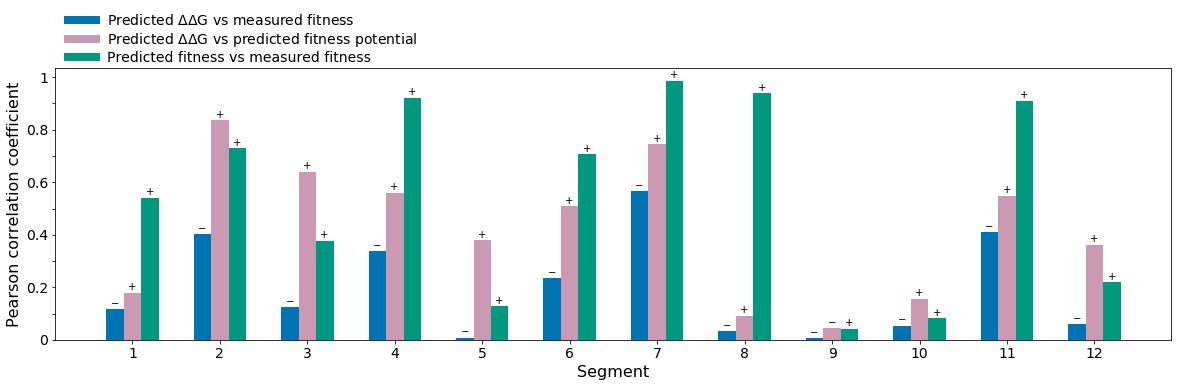

In [11]:
plt.close('all')

sign_dict = {-1:u'−',1:u'+'}
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
for i in range(1,13):

    d = potential_and_ddG[potential_and_ddG['segment_x']=='S%s_scaled'%i].dropna()
    c1 = stats.linregress(d.ddG.values,d.observed.values).rvalue
    c2 = stats.linregress(d.ddG.values,d.fitnessPotential.values).rvalue
    c3 = stats.linregress(d.predictedMinusObserved.values + d.observed.values,d.observed.values).rvalue
    
    ax.bar(i-0.2,np.absolute(c1),color=[0.,.45,.7],width=.2)
    plt.text(i-0.25,np.absolute(c1)+.01,sign_dict[int(np.sign(c1))])
    
    ax.bar(i,np.absolute(c2),color=[.8,.6,.7],width=.2)
    plt.text(i-0.05,np.absolute(c2)+.01,sign_dict[int(np.sign(c2))])
    
    ax.bar(i+0.2,np.absolute(c3),color=[0.,.6,.5],width=.2)
    plt.text(i+0.15,np.absolute(c3)+.01,sign_dict[int(np.sign(c3))])
    
plt.plot([np.nan],color=[0.,.45,.7],label=r'Predicted $\Delta\Delta$G vs measured fitness')
plt.plot([np.nan],color=[.8,.6,.7],label=r'Predicted $\Delta\Delta$G vs predicted fitness potential')
plt.plot([np.nan],color=[0.,.6,.5],label=r'Predicted fitness vs measured fitness')
leg=plt.legend(frameon=False,fontsize=14,labelspacing=.2,loc=2,bbox_to_anchor=[0.,1.25])
set_legend_linewidth(leg,8)
plt.xlabel("Segment",size=16)
plt.ylabel("Pearson correlation coefficient",size=16)
plt.xticks(range(1,13))
ax.set_xticklabels(['%s' % k for k in range(1,13)],fontsize=14)
plt.yticks([0,0.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0])
ax.set_xticklabels(['%s' % k for k in range(1,13)],fontsize=14)
ax.set_yticklabels(['0','','0.2','','0.4','','0.6','','0.8','','1'],fontsize=14)

plt.savefig("../Sasha/S7-all-cor-Pearson.png",bbox_inches='tight',dpi=300)

## Spearman

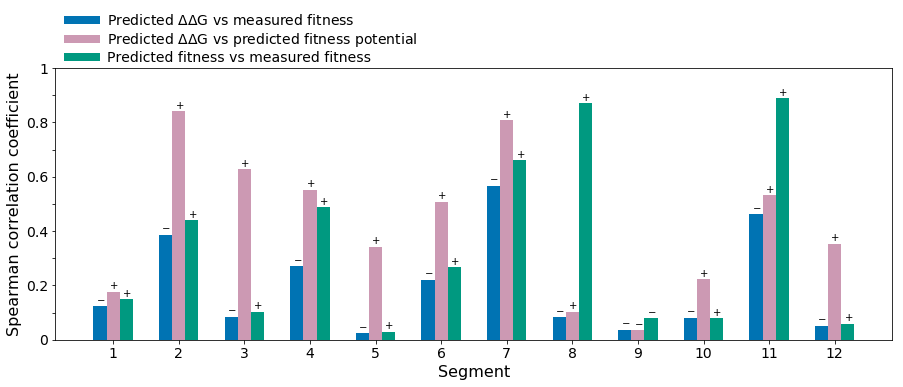

In [8]:
plt.close('all')

sign_dict = {-1:u'−',1:u'+'}
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
for i in range(1,13):

    d = potential_and_ddG[potential_and_ddG['segment_x']=='S%s_scaled'%i].dropna()
    c1 = stats.spearmanr(d.ddG.values,d.observed.values).correlation
    c2 = stats.spearmanr(d.ddG.values,d.fitnessPotential.values).correlation
    c3 = stats.spearmanr(d.predictedMinusObserved.values + d.observed.values,d.observed.values).correlation
    
    ax.bar(i-0.2,np.absolute(c1),color=[0.,.45,.7],width=.2)
    plt.text(i-0.25,np.absolute(c1)+.01,sign_dict[int(np.sign(c1))])
    
    ax.bar(i,np.absolute(c2),color=[.8,.6,.7],width=.2)
    plt.text(i-0.05,np.absolute(c2)+.01,sign_dict[int(np.sign(c2))])
    
    ax.bar(i+0.2,np.absolute(c3),color=[0.,.6,.5],width=.2)
    plt.text(i+0.15,np.absolute(c3)+.01,sign_dict[int(np.sign(c3))])
    
plt.plot([np.nan],color=[0.,.45,.7],label=r'Predicted $\Delta\Delta$G vs measured fitness')
plt.plot([np.nan],color=[.8,.6,.7],label=r'Predicted $\Delta\Delta$G vs predicted fitness potential')
plt.plot([np.nan],color=[0.,.6,.5],label=r'Predicted fitness vs measured fitness')
leg=plt.legend(frameon=False,fontsize=14,labelspacing=.2,loc=2,bbox_to_anchor=[0.,1.25])
set_legend_linewidth(leg,8)
plt.xlabel("Segment",size=16)
plt.ylabel("Spearman correlation coefficient",size=16)
plt.xticks(range(1,13))
ax.set_xticklabels(['%s' % k for k in range(1,13)],fontsize=14)
plt.yticks([0,0.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0])
ax.set_xticklabels(['%s' % k for k in range(1,13)],fontsize=14)
ax.set_yticklabels(['0','','0.2','','0.4','','0.6','','0.8','','1'],fontsize=14)

plt.savefig("../Sasha/S7-all-cor-Spearman.png",bbox_inches='tight',dpi=300)